<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## (MORE) Deep Learning exercises for week 3

Load the newswire dataset from the exercises and prepare it to a neural network with two hidden layers.

Write a function that allows you to control whether a dropout is applied to each layer.

Finally, use the function to compare the validation lose curves for three different training runs: (1) dropout only in the first layer, (2) dropout only in the second layer, (3) dropout in the both layers, and (4) no dropout. Let the number of neurons in each run be the same, but think about what a reasonable number of neurons would be and why.

**Load and prepare the newswire dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Create the function**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

def train_model_with_dropout(partial_x_train, partial_y_train, x_val, y_val, dropout_positions, dropout_rate=0.5):
    model = keras.Sequential()

    # Add the first dense layer
    model.add(layers.Dense(256, activation="relu"))
    if 'first' in dropout_positions:
        model.add(layers.Dropout(dropout_rate))

    # Add the second dense layer
    model.add(layers.Dense(256, activation="relu"))
    if 'last' in dropout_positions:
        model.add(layers.Dropout(dropout_rate))

    # Add the output layer
    model.add(layers.Dense(46, activation="softmax"))

    model.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0)  # Set verbose to 0 for less output

    return history.history['val_loss']


Training model with dropout at: No Dropout
Training model with dropout at: First Layer
Training model with dropout at: Last Layer
Training model with dropout at: First and Last Layers


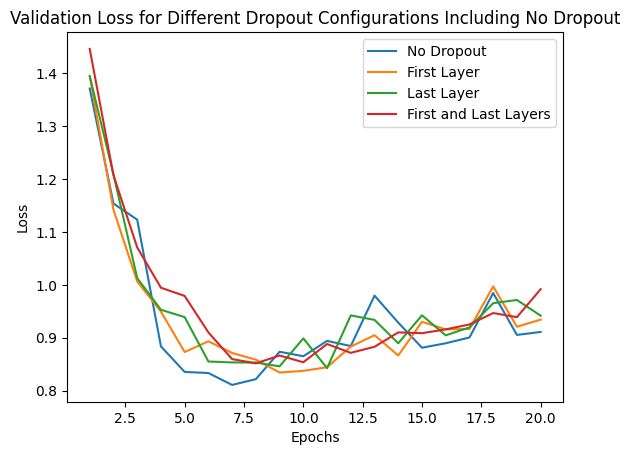

In [ ]:
dropout_configs = {
    'No Dropout': [],
    'First Layer': ['first'],
    'Last Layer': ['last'],
    'First and Last Layers': ['first', 'last']
}

# Assuming partial_x_train, partial_y_train, x_val, and y_val are defined
histories = {}

for config_name, positions in dropout_configs.items():
    print(f"Training model with dropout at: {config_name}")
    val_loss = train_model_with_dropout(partial_x_train, partial_y_train, x_val, y_val, positions)
    histories[config_name] = val_loss

# Plotting
epochs = range(1, 21)
for config_name, val_loss in histories.items():
    plt.plot(epochs, val_loss, label=config_name)

plt.title('Validation Loss for Different Dropout Configurations Including No Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
